# Global Water budget

In [1]:
import lenapy
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

/work/scratch/env/blazqueza/.conda/envs/lenapy/lib/python3.11/site-packages/esmpy/interface/loadESMF.py:92: VersionWarning: ESMF installation version 8.6.1, ESMPy version 8.6.0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


### Open the ocean mass and its contributors time series

In [2]:
ds=xr.open_dataset('../../data/global_water_budget.nc',engine='lenapyNetcdf')
data=ds.MassChange

## Barystatic Sea Level analysis

In [3]:
# Calcul de coefficients de climato
BSL=data.sel(maskGlobalBudget='Ocean')
coeffs=BSL.lntime.Coeffs_climato()
climato=coeffs.solve()
climato.result.load()

<xarray.DataArray 'MassChange' (product_leakage: 1, product_earthquake: 1,
                                product_filter: 2, product_center: 5,
                                product_GIA: 2, product_C20: 3,
                                product_geocenter: 2, coeffs: 6)> Size: 6kB
array([[[[[[[[-9.58647476e+00, -1.84482885e-01, -3.74030088e-01,
              -2.92337168e-01, -9.37846338e+00,  4.43607432e-03],
             [-1.02043911e+01, -2.36859232e-01, -4.45448962e-01,
              -2.28616066e-02, -1.31640674e+01,  5.86477881e-03]],

            [[-9.70688635e+00,  4.22223490e-01, -2.57326598e-01,
              -4.18650785e-01, -9.44069816e+00,  4.43874449e-03],
             [-1.03248027e+01,  3.69847144e-01, -3.28745472e-01,
              -1.49175224e-01, -1.32263021e+01,  5.86744898e-03]],

            [[-9.56854614e+00, -5.21655048e-01, -4.38472098e-01,
              -2.45271156e-01, -9.39839179e+00,  4.43790857e-03],
             [-1.01864625e+01, -5.74031395e-01, -5.09890972e-01,
               2.42044053e-02, -1.31839958e+01,  5.86661306e-03]]],


           [[[-9.58647476e+00, -1.84482885e-01, -3.74030088e-01,
              -2.92337168e-01, -1.06199305e+01,  4.89885482e-03],
             [-1.02043911e+01, -2.36859232e-01, -4.45448962e-01,
              -2.28616066e-02, -1.44055344e+01,  6.32755931e-03]],
...
            [[-8.99560348e+00, -4.35502432e-01, -3.23369275e-01,
              -2.40402003e-01, -9.02240595e+00,  4.30502257e-03],
             [-9.61351983e+00, -4.87878778e-01, -3.94788149e-01,
               2.90735581e-02, -1.28080099e+01,  5.73372707e-03]]],


           [[[-9.01353210e+00, -9.83302688e-02, -2.58927265e-01,
              -2.87468015e-01, -1.02439446e+01,  4.76596882e-03],
             [-9.63144845e+00, -1.50706615e-01, -3.30346139e-01,
              -1.79924538e-02, -1.40295486e+01,  6.19467331e-03]],

            [[-9.13394369e+00,  5.08376106e-01, -1.42223776e-01,
              -4.13781633e-01, -1.03061794e+01,  4.76863899e-03],
             [-9.75186004e+00,  4.55999760e-01, -2.13642650e-01,
              -1.44306071e-01, -1.40917834e+01,  6.19734348e-03]],

            [[-8.99560348e+00, -4.35502432e-01, -3.23369275e-01,
              -2.40402003e-01, -1.02638730e+01,  4.76780307e-03],
             [-9.61351983e+00, -4.87878778e-01, -3.94788149e-01,
               2.90735581e-02, -1.40494770e+01,  6.19650757e-03]]]]]]]])
Coordinates:
  * product_center      (product_center) <U6 120B 'CSR' 'JPL' ... 'CNES' 'GFZ'
  * product_filter      (product_filter) <U4 32B 'DDK6' 'DDK3'
  * product_earthquake  (product_earthquake) <U7 28B 'Earthq0'
  * product_leakage     (product_leakage) <U13 52B 'IceSheetsOnly'
  * product_GIA         (product_GIA) <U10 80B 'ICE6GD' 'Caron_2018'
  * product_C20         (product_C20) <U7 84B 'Lemoine' 'Cheng' 'Loomis'
  * product_geocenter   (product_geocenter) <U7 56B 'Lemoine' 'Sun'
    maskGlobalBudget    <U25 100B 'Ocean'
  * coeffs              (coeffs) <U13 312B 'cosAnnual' 'sinAnnual' ... 'order_1'

In [4]:
# Text of legend
trends=climato.result.sel({'coeffs':'order_1'})*lenapy.constants.LNPY_DAYS_YEAR
year_amplitudes=np.sqrt(climato.result.sel({'coeffs':'cosAnnual'})**2+
                        climato.result.sel({'coeffs':'sinAnnual'})**2)
    

trend_text=f"Trend {'{:0.2f}'.format(trends.mean().values)} \u00B1 {'{:0.2f}'.format(trends.std().values)} mm SLE/yr"
annual_text=f"Annual-cycle amplitude {'{:0.2f}'.format(year_amplitudes.mean().values)} \u00B1 {'{:0.2f}'.format(year_amplitudes.std().values)} mm SLE"


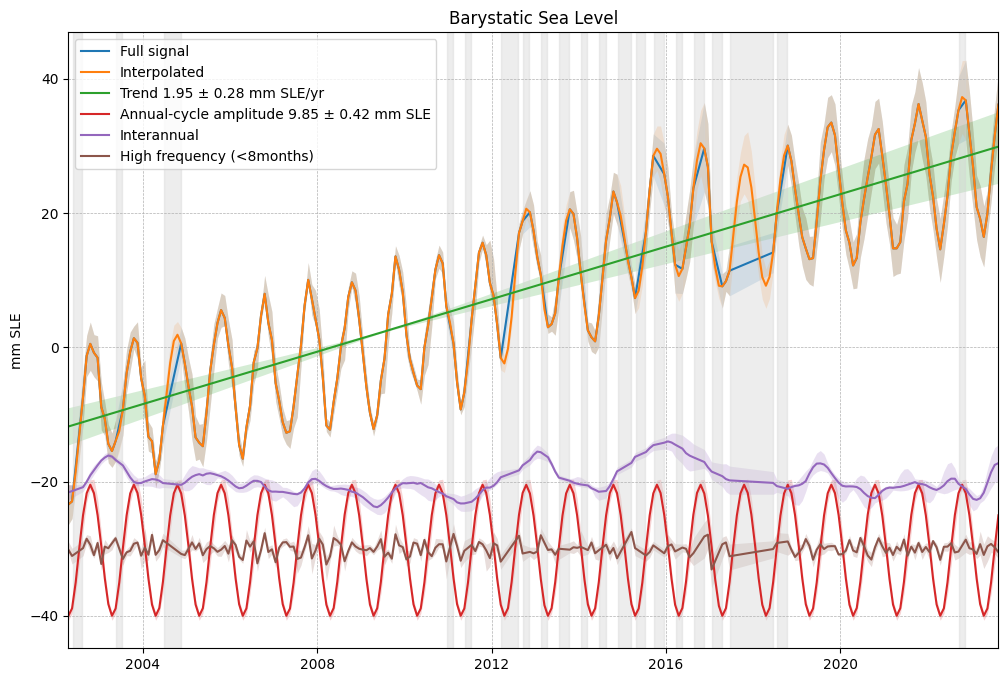

In [5]:

fig, ax = plt.subplots(1,1,figsize=(12,8), dpi=100)
BSL.lntime.plot(label='Full signal')
complete=climato.signal(method='linear',x=BSL.lntime.fill_time())

complete.lntime.plot(label='Interpolated')

(climato.climatology(x=BSL.lntime.fill_time(),coefficients=['order_0','order_1'])).lntime.plot(label=trend_text)

(climato.climatology(x=BSL.lntime.fill_time(),coefficients=['cosAnnual','sinAnnual','cosSemiAnnual','sinSemiAnnual'])-30).lntime.plot(label=annual_text)

interannual=climato.residuals().lntime.filter(cutoff=8,order=3)

(interannual-20).lntime.plot(label='Interannual')
(climato.residuals()-interannual-30).lntime.plot(label='High frequency (<8months)')


gaps=BSL.time.diff(dim='time')/np.timedelta64(1,"D")
mask = gaps > 35
first_figure_y_limits = plt.ylim()
for i in range(len(gaps)):
    if mask[i]:
        plt.fill_betweenx(y=first_figure_y_limits,  # Normalize height
                          x1=BSL.time[i]+np.timedelta64(5,"D"), 
                          x2=BSL.time[i + 1]-np.timedelta64(5,"D"),
                          color='lightgray', alpha=0.4)
plt.ylim(first_figure_y_limits)
plt.xlim([BSL.time[0],BSL.time[-1]])

ax.set_ylabel(f'mm SLE')
plt.title(f'Barystatic Sea Level')

ax.legend()
ax.set_xlabel('')
ax.grid(linestyle='--', linewidth=0.5)

## Global Water Budget

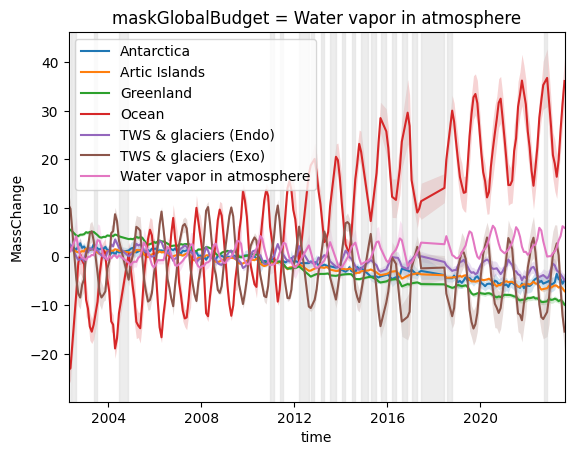

In [6]:
# Select dimensions starting with "product"
product_dims = [dim for dim in data.dims if dim.startswith("product")]

# Compute the mean over those dimensions
data.lntime.plot(hue='maskGlobalBudget')

gaps=BSL.time.diff(dim='time')/np.timedelta64(1,"D")
mask = gaps > 35
first_figure_y_limits = plt.ylim()
for i in range(len(gaps)):
    if mask[i]:
        plt.fill_betweenx(y=first_figure_y_limits,  # Normalize height
                          x1=BSL.time[i]+np.timedelta64(5,"D"), 
                          x2=BSL.time[i + 1]-np.timedelta64(5,"D"),
                          color='lightgray', alpha=0.4)
plt.ylim(first_figure_y_limits)

plt.xlim([data.time[0],data.time[-1]])

ax.set_ylabel(f'mm SLE')
ax.grid(linestyle='--', linewidth=0.5)